# 2. Exploration

In [1]:
try(library(tidyverse), silent=TRUE)
library(lubridate)
library(glue)
library(cowplot)
library(survminer)
library(survival)
library(ggsci)
library(arsenal)
library(yaml)

#setwd("/")
#path = "/home/steinfej/projects/uk_biobank/"
#dataset_path = "data/datasets/cvd_big_excl"

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse



Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp


Loading required package: ggpubr


Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend



Attaching package: 'arsenal'


The following object is masked from 'package:lubridate':

    is.Date




In [8]:
dataset_name = "cvd_massive_excl_emb"
path = "/data/analysis/ag-reils/steinfej/code/umbrella/pre/ukbb"
data_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS/data"
dataset_path = glue("{data_path}/2_datasets_pre/{dataset_name}")

## Load data

In [9]:
data = arrow::read_feather(glue("{dataset_path}/baseline_clinical.feather")) 
data_description = arrow::read_feather(glue("{dataset_path}/baseline_description.feather"))

In [10]:
phenotypes = names(read_yaml(glue("{dataset_path}/phenotype_list.yaml")))
family_history = names(read_yaml(glue("{dataset_path}/fh_list.yaml")))
medications = names(read_yaml(glue("{dataset_path}/medication_list.yaml")))
endpoints_ph = names(read_yaml(glue("{dataset_path}/endpoint_list.yaml")))
endpoints_death = names(read_yaml(glue("{dataset_path}/death_list.yaml")))
endpoints_scores = names(read_yaml(glue("{dataset_path}/scores_list.yaml")))
endpoints = c(endpoints_ph, endpoints_death, endpoints_scores)

In [11]:
covariates = (data_description %>% filter(isTarget==FALSE) %>% filter(based_on!="PGS"))$covariate[-1]
targets = (data_description %>% filter(isTarget==TRUE))$covariate[-1]
pgs = (data_description %>% filter(isTarget==FALSE) %>% filter(based_on=="PGS") %>% filter(!dtype=="Date"))$covariate

In [59]:
unique(data_description$based_on)

[1] "admin"              "PGS"                "basics"            
 [4] "questionnaire"      "measurements"       "labs"              
 [7] "family_history"     "diagnoses"          "diagnoses_emb"     
[10] "medications"        "endpoints_hospital" "endpoints_death"   
[13] "score_SCORE"        "score_ASCVD"        "score_QRISK3"      
[16] "score_MACE"

In [74]:
data_description %>% filter(based_on %in% c("measurements", "labs")) %>% write_csv("/data/analysis/ag-reils/ag-reils-shared/cardioRS/data/retina_labels/measurements_labs.csv")

In [56]:
medications

[1] "agents_acting_on_the_renin-angiotensin_system"                   
 [2] "all_other_non-therapeutic_products"                              
 [3] "all_other_therapeutic_products"                                  
 [4] "allergens"                                                       
 [5] "anabolic_agents_for_systemic_use"                                
 [6] "analgesics"                                                      
 [7] "anesthetics"                                                     
 [8] "anthelmintics"                                                   
 [9] "anti-acne_preparations"                                          
[10] "anti-parkinson_drugs"                                            
[11] "antianemic_preparations"                                         
[12] "antibacterials_for_systemic_use"                                 
[13] "antibiotics_and_chemotherapeutics_for_dermatological_use"        
[14] "antidiarrheals,_intestinal_antiinflammatory/antiinfective_agents"
[15] "antiemetics_and_antinauseants"                                   
[16] "antiepileptics"                                                  
[17] "antifungals_for_dermatological_use"                              
[18] "antigout_preparations"                                           
[19] "antihemorrhagics"                                                
[20] "antihistamines_for_systemic_use"                                 
[21] "antihypertensives"                                               
[22] "antiinflammatory_and_antirheumatic_products"                     
[23] "antimycobacterials"                                              
[24] "antimycotics_for_systemic_use"                                   
[25] "antineoplastic_agents"                                           
[26] "antiobesity_preparations,_excl._diet_products"                   
[27] "antiprotozoals"                                                  
[28] "antipruritics,_incl._antihistamines,_anesthetics,_etc."          
[29] "antipsoriatics"                                                  
[30] "antiseptics_and_disinfectants"                                   
[31] "antithrombotic_agents"                                           
[32] "antivirals_for_systemic_use"                                     
[33] "appetite_stimulants"                                             
[34] "ass"                                                             
[35] "atypical_antipsychotics"                                         
[36] "beta_blocking_agents"                                            
[37] "bile_and_liver_therapy"                                          
[38] "blood_substitutes_and_perfusion_solutions"                       
[39] "calcium_channel_blockers"                                        
[40] "calcium_homeostasis"                                             
[41] "cardiac_therapy"                                                 
[42] "contrast_media"                                                  
[43] "corticosteroids,_dermatological_preparations"                    
[44] "corticosteroids_for_systemic_use"                                
[45] "cough_and_cold_preparations"                                     
[46] "diagnostic_agents"                                               
[47] "diagnostic_radiopharmaceuticals"                                 
[48] "digestives,_incl._enzymes"                                       
[49] "diuretics"                                                       
[50] "drugs_for_acid_related_disorders"                                
[51] "drugs_for_constipation"                                          
[52] "drugs_for_functional_gastrointestinal_disorders"                 
[53] "drugs_for_obstructive_airway_diseases"                           
[54] "drugs_for_treatment_of_bone_diseases"                            
[55] "drugs_used_in_diabetes"                                          
[56] "ectoparasiticides,_incl._scabicides

In [54]:
ranking_diagnoses = as.data.frame(t(data %>% dplyr::summarise(across(all_of(phenotypes), mean))))
ranking_diagnoses = tibble::rownames_to_column(ranking_diagnoses, var = "column")
colnames(ranking_diagnoses) = c("column", "frequency")
ranking_diagnoses = ranking_diagnoses %>% arrange(desc(frequency)) %>% mutate(rank=row_number())

In [65]:
ranking_diagnoses %>% filter(frequency>0) %>% write_csv("/data/analysis/ag-reils/ag-reils-shared/cardioRS/data/retina_labels/diagnoses.csv")

In [66]:
measurements

ERROR: Error in eval(expr, envir, enclos): object 'measurements' not found


In [7]:
covariates[700:900]

[1] "chronic_alcoholism_in_remission"                           
  [2] "chronic_pancreatitis"                                      
  [3] "gastroparesis"                                             
  [4] "ectopic_pregnancy"                                         
  [5] "muscle_weakness"                                           
  [6] "recurrent_major_depression"                                
  [7] "pilonidal_cyst"                                            
  [8] "pain_in_toe"                                               
  [9] "pulmonary_tuberculosis"                                    
 [10] "celiac_disease"                                            
 [11] "cramp_in_lower_leg"                                        
 [12] "secondary_malignant_neoplasm_of_pleura"                    
 [13] "fracture_of_hand"                                          
 [14] "cyst_of_breast"                                            
 [15] "nephrotic_syndrome"                                        
 [16] "polyp_of_nasal_sinus"                                      
 [17] "chondromalacia_of_patella"                                 
 [18] "spinal_stenosis_in_cervical_region"                        
 [19] "disorder_of_artery"                                        
 [20] "vitiligo"                                                  
 [21] "female_cystocele"                                          
 [22] "dysphasia"                                                 
 [23] "retinal_disorder"                                          
 [24] "epiretinal_membrane"                                       
 [25] "recurrent_major_depression_in_partial_remission"           
 [26] "infection_caused_by_trichomonas"                           
 [27] "osteomyelitis"                                             
 [28] "polyp_of_nasal_cavity_and/or_nasal_sinus"                  
 [29] "mass_of_neck"                                              
 [30] "idiopathic_thrombocytopenic_purpura"                       
 [31] "complete_miscarriage"                                      
 [32] "gastric_ulcer"                                             
 [33] "papilloma_of_skin"                                         
 [34] "fetal_or_neonatal_effect_of_breech_delivery_and_extraction"
 [35] "secondary_malignant_neoplastic_disease"                    
 [36] "hypoxemia"                                                 
 [37] "paraplegia"                                                
 [38] "perforation_of_tympanic_membrane"                          
 [39] "ventricular_tachycardia"                                   
 [40] "mixed_incontinence"                                        
 [41] "disorder_of_eye_due_to_type_2_diabetes_mellitus"           
 [42] "trigeminal_neuralgia"                                      
 [43] "retinal_detachment"                                        
 [44] "leukopenia"                                                
 [45] "vitreous_hemorrhage"                                       
 [46] "ischemic_ulcer"                                            
 [47] "intramural_leiomyoma_of_uterus"                            
 [48] "viral_hepatitis_type_a"                                    
 [49] "m<U+00E9>ni<U+00E8>re's_disease"                           
 [50] "fracture_of_phalanx_of_hand"                               
 [51] "muscle_atrophy"                                            
 [52] "incontinence_of_feces"                                     
 [53] "mitral_valve_disorder"                                     
 [54] "atherosclerosis_of_arteries_of_the_extremities"            
 [55] "spondylosis"                                               
 [56] "pterygium"                                                 
 [57] "ulnar_neuropathy"                                          
 [58] "lung_mass"                                                 
 [59] "foreign_body_in_respiratory_tract"                         
 [60] "chronic_kidney_disease_stage_4"           

In [8]:
data = data %>% mutate_at(c("sex", "overall_health_rating", "smoking_status", "ethnic_background"), as.factor)
data = data %>% mutate(sex=fct_relevel(sex, c("Male", "Female")),
                       overall_health_rating=fct_relevel(overall_health_rating, c("Excellent", "Good", "Fair", "Poor")),
                       smoking_status=fct_relevel(smoking_status, c("Current", "Previous", "Never")))

## Missing values

In [8]:
#na_count <-data.frame(sapply(data %>% as.data.frame(), function(y) sum(length(which(is.na(y))))))
#na_count %>% filter(sapply(data %>% as.data.frame(), function(y) sum(length(which(is.na(y)))))>0)

# Covariates BIG

## Table 1

In [9]:
mycontrols  <- tableby.control(test=FALSE, total=TRUE,
                               numeric.test="kwt", cat.test="chisq",
                               numeric.stats=c("meansd"), numeric.simplify=TRUE,
                               cat.stats=c("countpct"), digits = 2L,cat.simplify = TRUE,
                               stats.labels=list(N='N', meansd='Median', Nmiss="Missing"))

# BASELINE

# Covariates Union

In [9]:
mycontrols  <- tableby.control(test=FALSE, total=TRUE,
                               numeric.test="kwt", cat.test="chisq",
                               numeric.stats=c("meansd"), numeric.simplify=TRUE,
                               cat.stats=c("countpct"), digits = 2L,cat.simplify = TRUE,
                               stats.labels=list(N='N', meansd='Median', Nmiss="Missing"))

In [10]:
f = list()
f$pgs = c('PGS000011', 'PGS000057', 'PGS000058', 'PGS000059')
f$basics = c('age_at_recruitment','sex', 'ethnic_background',"townsend_deprivation_index_at_recruitment")
f$questionnaire = c('overall_health_rating','smoking_status')
f$measurements = c('body_mass_index_bmi','weight',"standing_height",'systolic_blood_pressure','diastolic_blood_pressure')
f$labs = c("cholesterol", "hdl_cholesterol", "ldl_direct","triglycerides")
f$family_history = c('fh_heart_disease')
f$diagnoses = c("stroke", "diabetes1", "diabetes2", "chronic_kidney_disease", "atrial_fibrillation", "migraine", 
                      "rheumatoid_arthritis", "systemic_lupus_erythematosus", "severe_mental_illness", "erectile_dysfunction")
f$medications = c("antihypertensives", "ass", "atypical_antipsychotics", "glucocorticoids")

In [11]:
library(arsenal)
table_one = tableby(sex~., control=mycontrols, data=data %>% select(all_of(c(f$pgs, f$basics, f$questionnaire, f$measurements, f$labs, f$family_history, f$medications, f$diagnoses))))
write2html(table_one, glue("{dataset_path}/table1_union.html"));
#summary(table_one, text=TRUE)



processing file: table1_union.html.Rmd



  |......................................................................| 100%
  ordinary text without R code




output file: table1_union.html.knit.md




/home/steinfej/miniconda3/envs/python/bin/pandoc +RTS -K512m -RTS table1_union.html.utf8.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /data/analysis/ag-reils/ag-reils-shared/cardioRS/data/2_datasets_pre/cvd_massive_excl/table1_union.html --lua-filter /home/steinfej/miniconda3/envs/python/lib/R/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /home/steinfej/miniconda3/envs/python/lib/R/library/rmarkdown/rmarkdown/lua/latex-div.lua --email-obfuscation none --self-contained --standalone --section-divs --template /home/steinfej/miniconda3/envs/python/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/RtmpRfvefu/rmarkdown-str11963d037f4.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: /data/analysis/ag-reils/ag-reils-shared/cardioRS/data/2_datasets_pre/cvd_massive_excl/table1_union.html



# BASELINE

In [12]:
options(repr.plot.width=20, repr.plot.height=8)

In [13]:
base_size = 25
title_size = 35
facet_size = 25
geom_text_size=7
library(ggplot2); 
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0.5), 
                axis.title.y = element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.line.y = element_blank(), 
                strip.text.x = element_text(size = facet_size))) 

In [14]:
library(ggplot2); 
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0.5), 
                axis.title.y = element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.line.y = element_blank(), 
                strip.text.x = element_text(size = facet_size))) 

In [15]:
unique(data$ethnic_background)

[1] White   Black   <NA>    Asian   Mixed   Chinese
Levels: Asian Black Chinese Mixed White

### Basic Information

In [16]:
temp = data %>% select(all_of(c(f$basics, f$questionnaire))) %>% select_if(is.numeric) %>% pivot_longer(everything(), names_to="parameter", values_to="value") %>% mutate_at(vars(parameter), list(~ factor(., levels=unique(.))))
labels = c(age_at_recruitment = "age", townsend_deprivation_index_at_recruitment="townsend")
plot_age_te = ggplot(temp, aes(x=value))  + 
    geom_density(adjust=1.5, fill="gray70")+  facet_wrap(~parameter, ncol=1, scales = "free", labeller=labeller(parameter=labels))+
    scale_y_continuous(expand=c(0,0))+ xlab("") 

In [17]:
temp = data %>% select(all_of(c(f$basics, f$questionnaire))) %>% select_if(is.factor) %>% select_if(is.factor) %>% drop_na()  %>% pivot_longer(everything(), names_to="parameter", values_to="value",values_ptypes=list(value="character")) %>% 
    group_by(parameter, value, .drop = TRUE) %>% summarise(count=n(), ratio=round((100*n()/502504), 1)) %>% ungroup() %>% mutate_at(vars(parameter), list(~ factor(., levels=unique(.))))
plot_seth = ggplot(temp, aes(x=value, y=ratio, fill=parameter))+ 
    geom_bar(stat="identity", position=position_dodge(width = 0.8), fill="gray70", width=0.5) +
    geom_text(aes(label=paste0(ratio, " %")), vjust=-1, size = geom_text_size) + 
    scale_y_continuous(expand=c(0,0), limits=c(0, max(temp$ratio)*1.2))+ xlab("") + 
    #theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    facet_grid(~parameter, scales = "free", space="free")

`summarise()` regrouping output by 'parameter' (override with `.groups` argument)



In [18]:
options(repr.plot.width=20, repr.plot.height=8)
plot_title = ggplot(temp, aes(x=value))  + ggtitle("Basic Information")
title <- ggdraw(get_title(plot_title))
plot_basics_raw = plot_grid(plot_age_te, plot_seth, ncol=2, rel_widths=c(1, 4), align="h", axis="lr")
plot_basics = plot_grid(title, plot_basics_raw , ncol=1, rel_heights=c(0.1, 0.9), align="v", axis="lr") 

Warning message:
"Removed 516 rows containing non-finite values (stat_density)."


In [19]:
options(repr.plot.width=20, repr.plot.height=8)
temp = data %>% select(all_of(f$pgs)) %>% pivot_longer(everything(), names_to="parameter", values_to="value") %>% mutate_at(vars(parameter), list(~ factor(., levels=unique(.))))
plot_pgs = ggplot(temp, aes(x=value)) + ggtitle("Polygenic Scores") + 
    geom_density(adjust=1.5, fill="gray70") +
    scale_y_continuous(expand=c(0,0))+ xlab("") + 
    facet_wrap(~parameter, ncol=4, scales = "free")

In [20]:
options(repr.plot.width=20, repr.plot.height=8)
temp = data %>% select(all_of(c(f$measurements, f$labs))) %>% pivot_longer(everything(), names_to="parameter", values_to="value")  %>% mutate_at(vars(parameter), list(~ factor(., levels=unique(.))))
plot_meas = ggplot(temp, aes(x=value)) + ggtitle("Measurements") + 
    geom_density(adjust=1.5, fill="gray70") +
    scale_y_continuous(expand=c(0,0))+ xlab("") + 
    facet_wrap(~parameter, ncol=5, scales = "free")

In [21]:
temp = data %>% select(c(any_of(f$diagnoses))) %>% 
    pivot_longer(everything(),names_to="category", values_to="Value") %>% 
    group_by(category) %>% summarise(ratio = sum(Value==TRUE)/n(), .groups = 'drop') %>% mutate(category = fct_reorder(category, ratio)) %>% mutate(ratio=ratio*100)
plot_conditions = ggplot(temp, aes(x=category, y=ratio)) + ggtitle("Conditions") + 
    geom_bar(stat="identity", position=position_dodge(width = 0.8), fill="gray70", width=0.5) +
    coord_flip()+xlab("") +
    ylab("Prevalence in [%]") +
    scale_y_continuous(expand=c(0,0), limits=c(0, max(temp$ratio)*1.3))+
    geom_text(aes(x=category, y=ratio, label=glue("{round(ratio,1)}%")), position = position_dodge(0.8), hjust=-0.1, size = geom_text_size)+ #nudge_y=+3000, 
    scale_x_discrete()+
    theme_classic(base_size = base_size)+ theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0.35))#, strip.text.x = element_text(size = 16))

In [22]:
temp = data %>% select(c(any_of(f$medications))) %>% 
    pivot_longer(everything(), names_to="category", values_to="Value") %>% 
    group_by(category) %>% summarise(ratio = sum(Value==TRUE)/n(), .groups = 'drop') %>% mutate(category = fct_reorder(category, ratio)) %>% mutate(ratio=ratio*100)
plot_medications = ggplot(temp, aes(x=category, y=ratio)) + ggtitle("Medications") + 
    geom_bar(stat="identity", position=position_dodge(width = 0.8), fill="gray70", width=0.5) +
    coord_flip()+xlab("") +
    ylab("Prevalence in [%]") +
    scale_y_continuous(expand=c(0,0), limits=c(0, max(temp$ratio)*1.3))+
    geom_text(aes(x=category, y=ratio, label=glue("{round(ratio,1)}%")), position = position_dodge(0.8), hjust=-0.1, size = geom_text_size)+ #nudge_y=+3000, 
    theme_classic(base_size = base_size) + theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0.35)) + 
    scale_x_discrete()

Warning message:
"Removed 48868 rows containing non-finite values (stat_density)."
Warning message:
"Removed 192399 rows containing non-finite values (stat_density)."


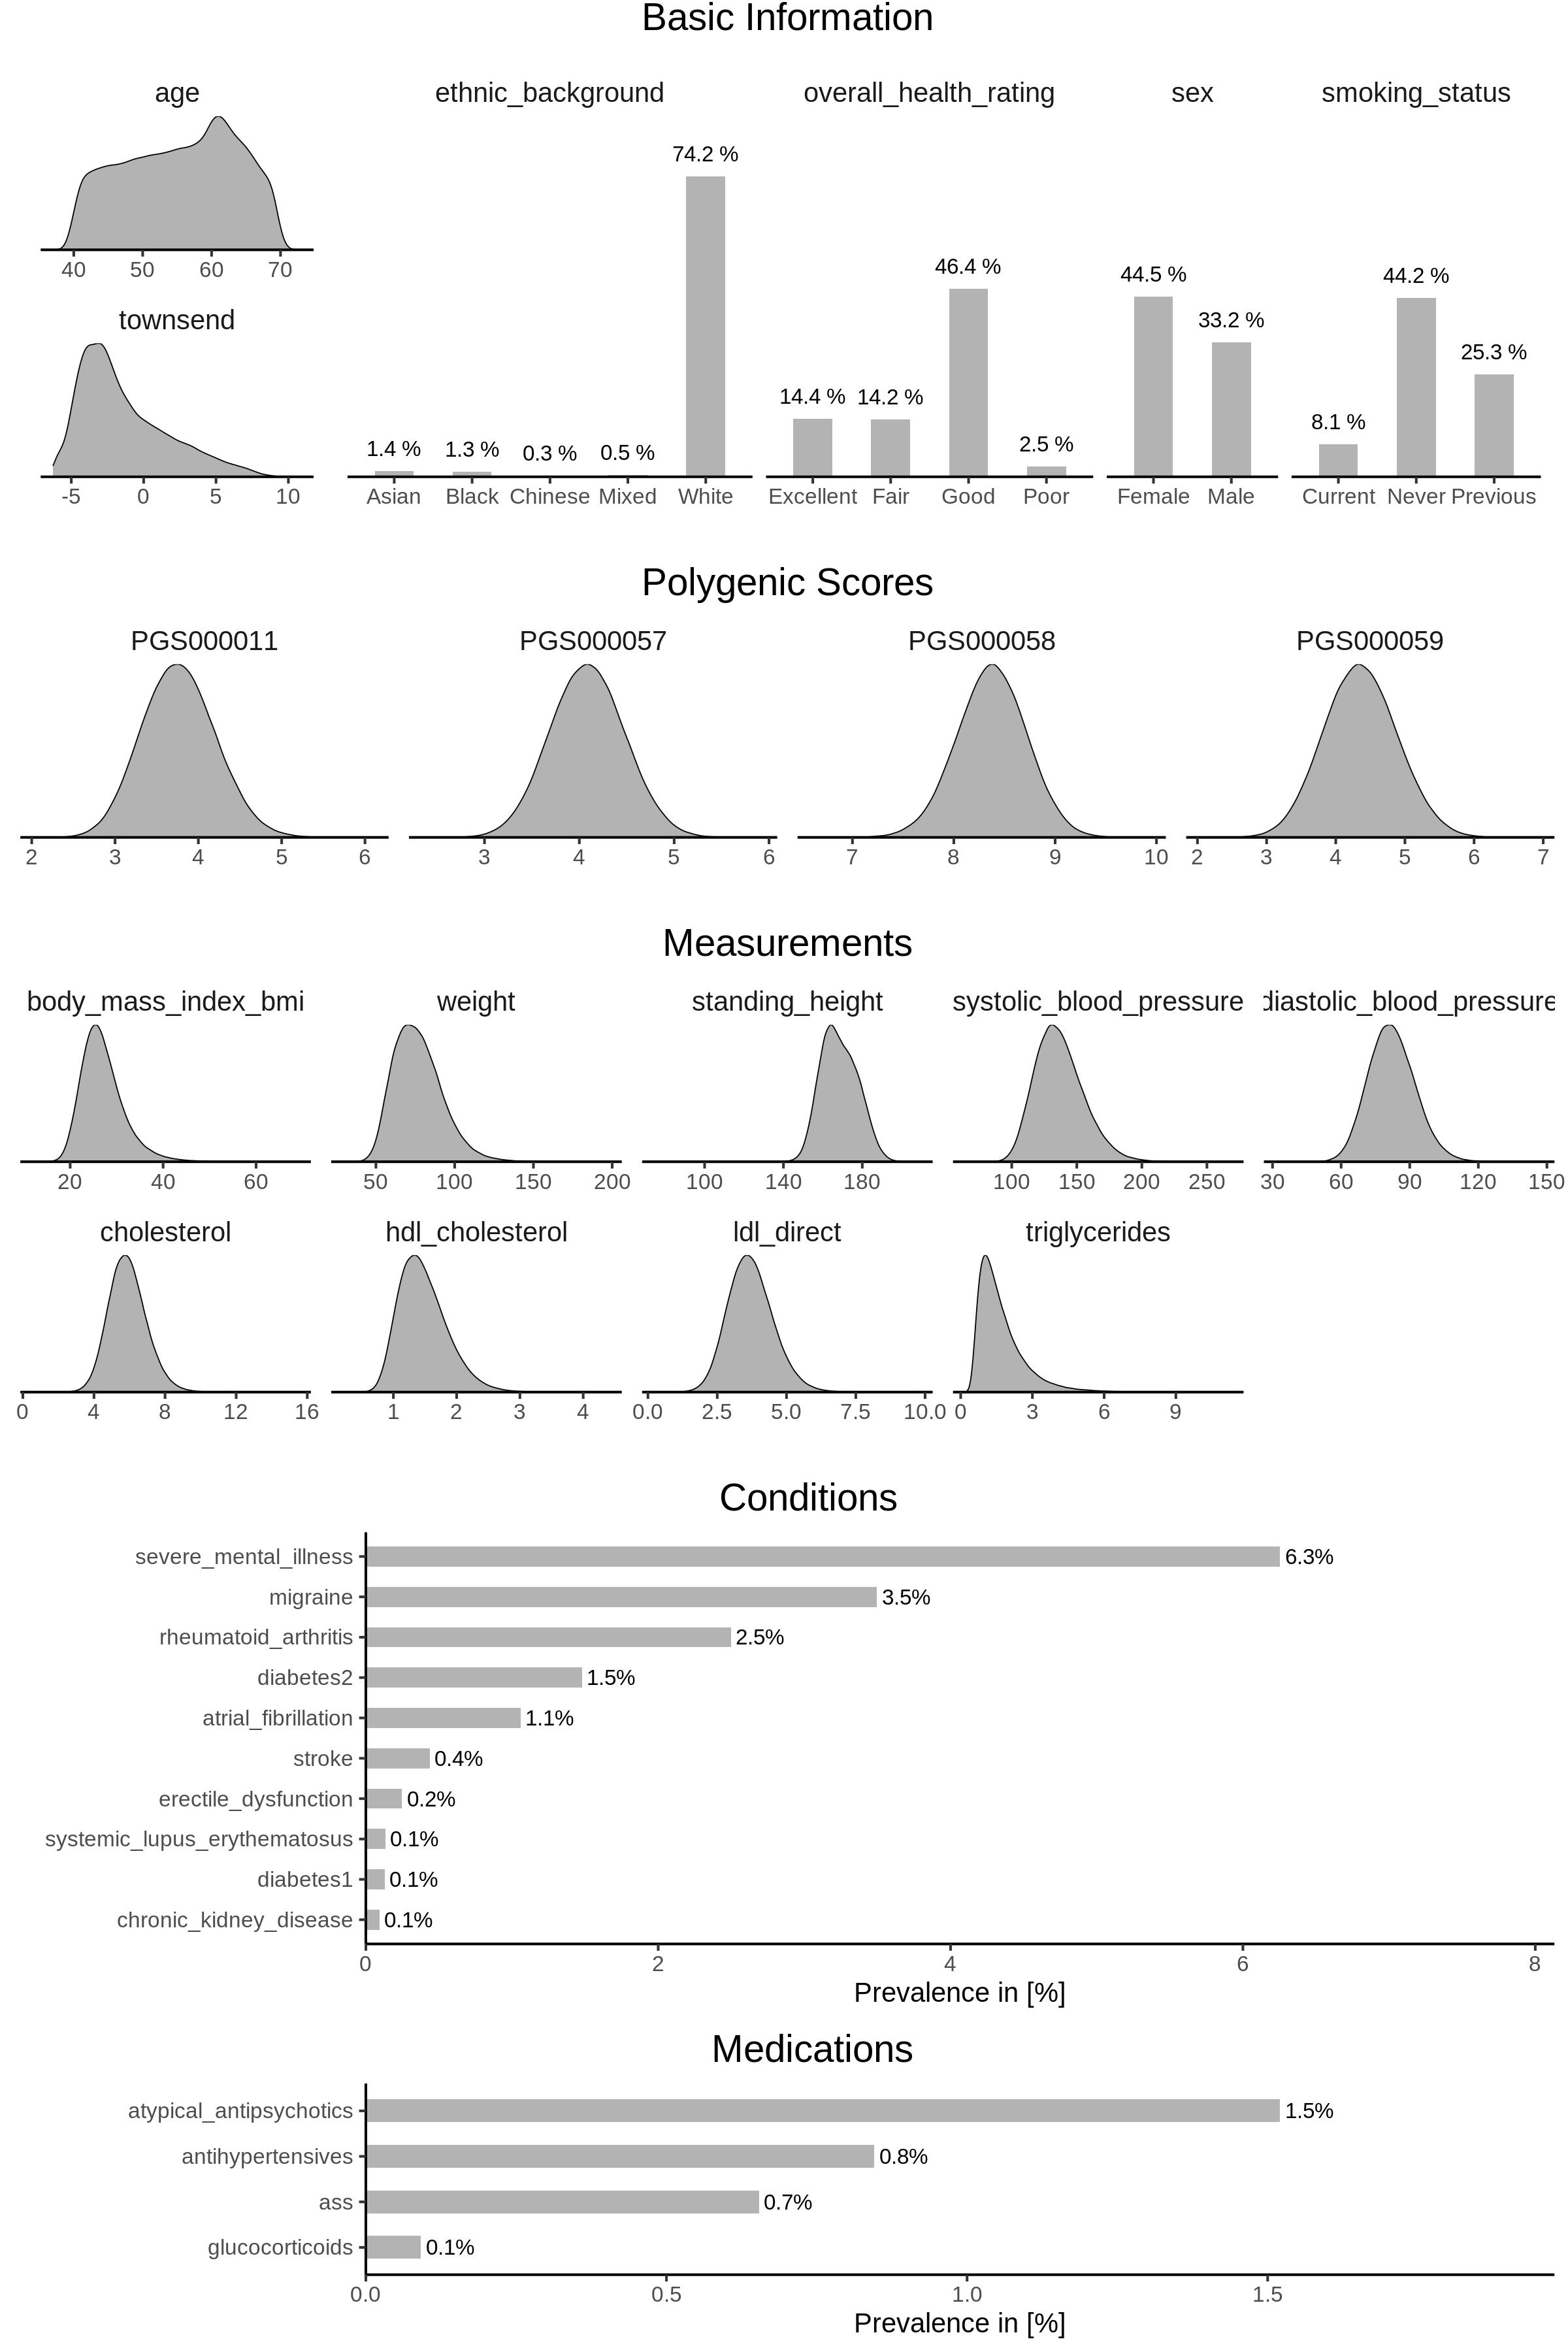

In [23]:
plot_width=20; plot_height=30; plot_dpi=300
options(repr.plot.width=plot_width, repr.plot.height=plot_height)
plot_1 = plot_grid(plot_basics, plot_pgs, plot_meas, ncol=1, rel_heights=c(2,1.3,2), align="v", axis="lr")
plot_2 = plot_grid(plot_conditions, plot_medications, ncol=1, rel_heights=c(3,1.8), align="v", axis="lr")
plot_desc = plot_grid(plot_1, plot_2, ncol=1, rel_heights=c(5,3), align="v", axis="lr")
plot_desc

plot_name = "1_dataset_characterization"
ggsave(filename=glue("{dataset_path}/{plot_name}.pdf"), plot=plot_desc, width=plot_width, height=plot_height, dpi=plot_dpi, device="pdf")

# OBSERVATION TIME

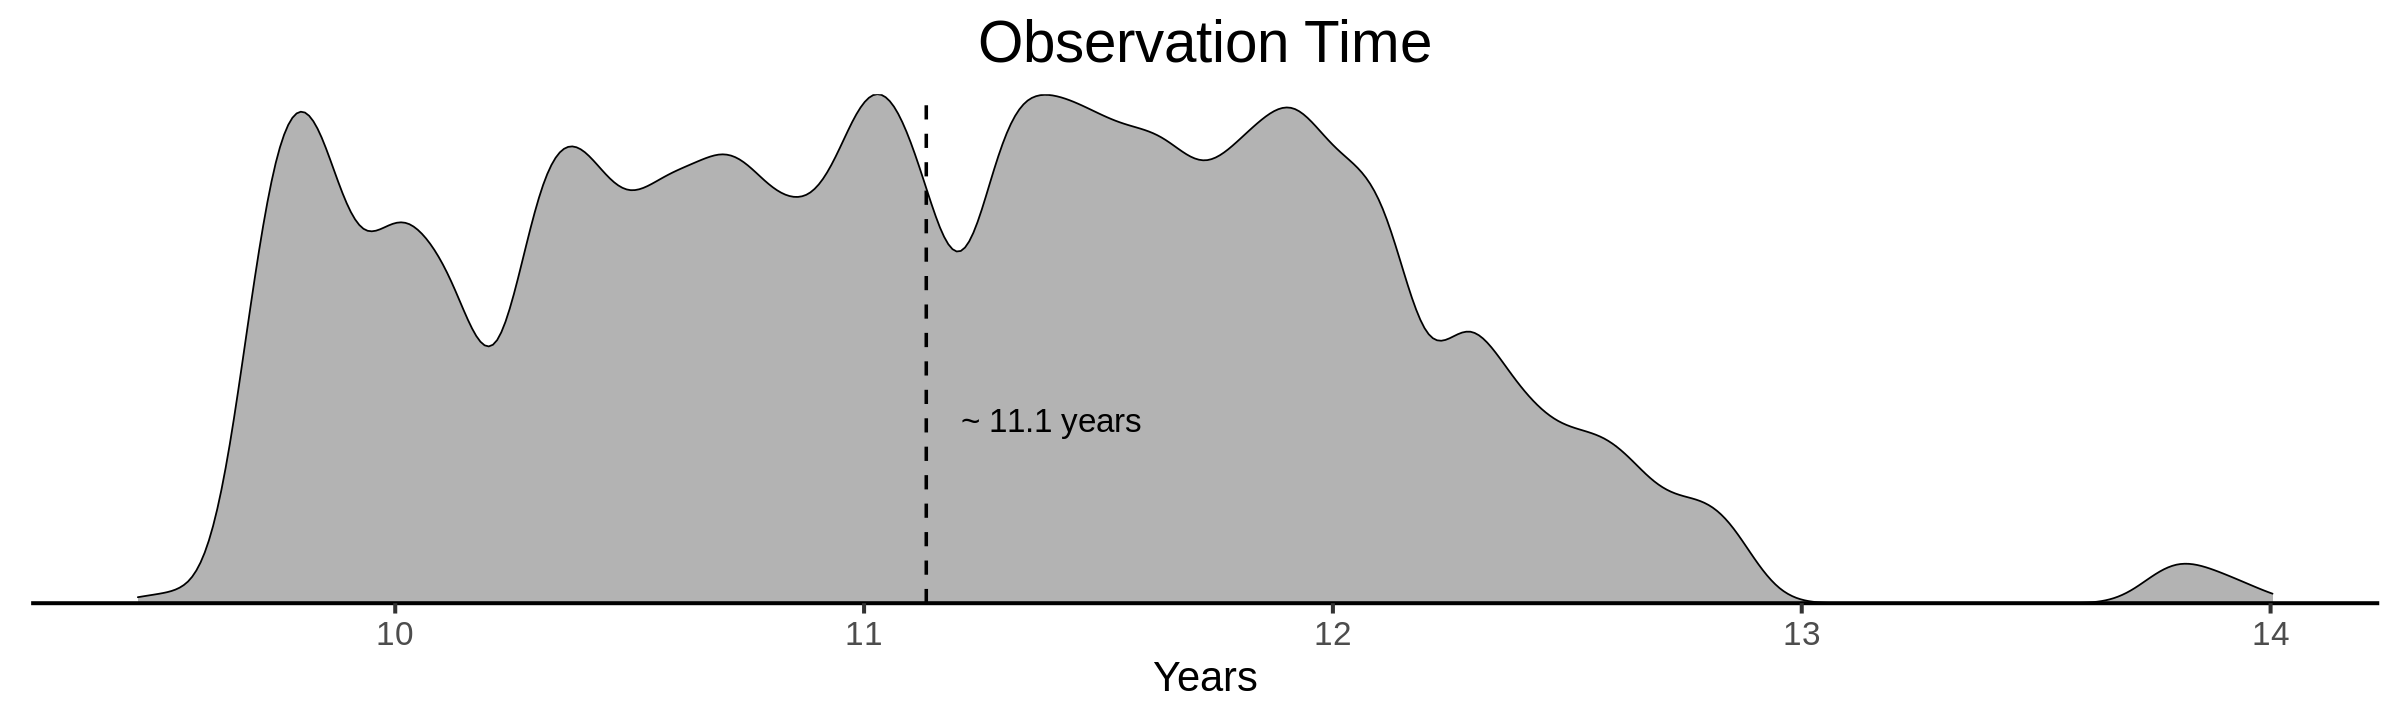

In [24]:
plot_width=20; plot_height=6; plot_dpi=300
options(repr.plot.width=plot_width, repr.plot.height=plot_height)
temp = data %>% filter(QRISK3_event==0)  %>% select(c(eid, QRISK3_event_time))
mean = round((temp %>% summarise(mean=mean(QRISK3_event_time)))$mean, 1)
obs_time = ggplot(temp, aes(x=QRISK3_event_time)) + ggtitle("Observation Time") + 
    geom_density(fill="gray70") +
    xlab("Years") +
    geom_vline(aes(xintercept=mean(QRISK3_event_time)),color="black", linetype="dashed", size=1)+
    #geom_text(x=mean, label=mean, y=0.15, hjust=-0.5)+
    #ylab("Prevalence in [%]") +
    scale_y_continuous(expand=c(0,0))+
   #theme_classic(base_size = 25) + theme(strip.background = element_blank(), plot.title=element_text(size=24, hjust=0.5))+
    annotate("text", x=mean+0.3, y=0.15, label=paste0("~ ", mean, " years"), size = geom_text_size)
obs_time
plot_name = "2_observation_time"
ggsave(filename=glue("{dataset_path}/{plot_name}.pdf"), plot=last_plot(), width=plot_width, height=plot_height, dpi=plot_dpi, device="pdf")

# ENDPOINTS

## Frequencies

In [25]:
plot_width=20; plot_height=6; plot_dpi=300
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

temp = data %>% select(c(any_of(targets))) %>% select(!contains("_time")) %>% select(!contains("cancer_breast")) %>% 
    pivot_longer(everything(), names_to="category", values_to="Value") %>% 
    group_by(category) %>% summarise(ratio = sum(Value!=0)/n(), count=sum(Value!=0), .groups = 'drop')  %>% mutate(ratio=ratio*100) %>% arrange(desc(count)) %>% mutate(category = fct_reorder(category, count))

plot_endpoints = ggplot(temp, aes(x=category, y=count)) + ggtitle("Endpoints") + 
    geom_bar(stat="identity", position=position_dodge(width = 0.8), fill="gray70", width=0.5) +
    coord_flip()+xlab("") +
    ylab("Number of Events (%)") +
    scale_y_continuous(expand=c(0,0), limits=c(0, max(temp$count)*1.3))+
    geom_text(aes(x=category, y=count, label=glue("{count} ({round(ratio,1)}%)")), position = position_dodge(0.8), hjust=-0.1, size = geom_text_size)+
    theme_classic(base_size = base_size) + theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0.35)) + 
    scale_x_discrete()

plot_name = "3_endpoints"
ggsave(filename=glue("{dataset_path}/{plot_name}.pdf"), plot=last_plot(), width=plot_width, height=plot_height, dpi=plot_dpi, device="pdf")

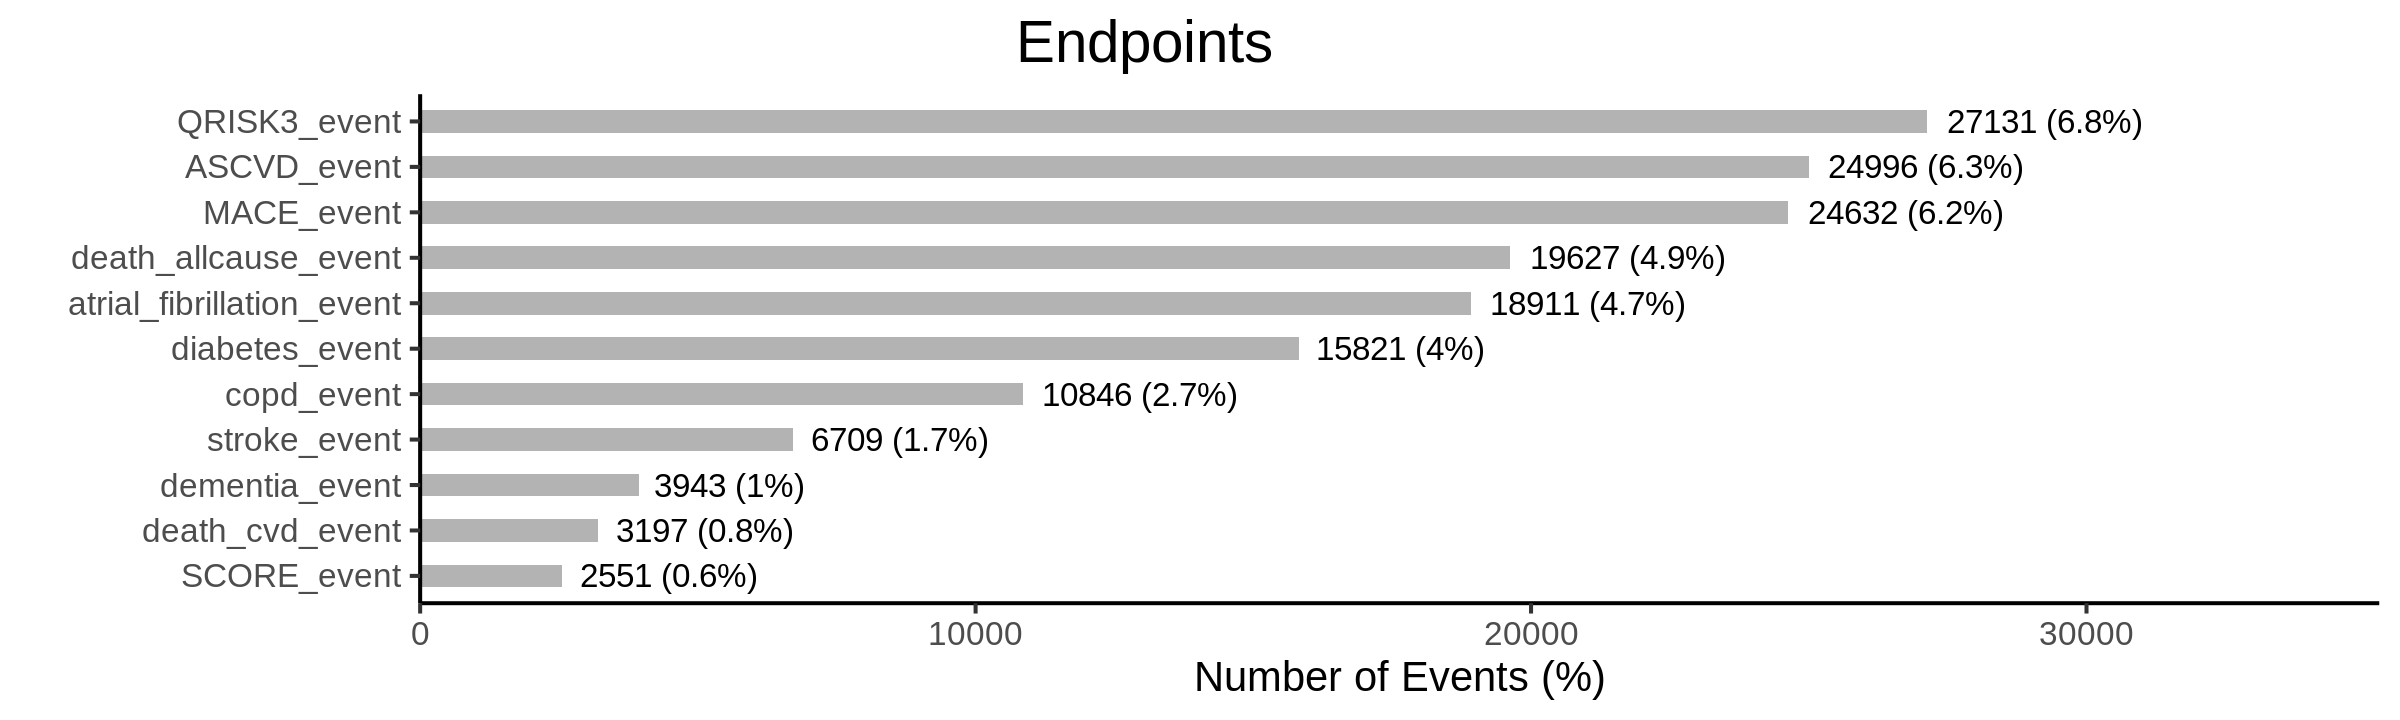

In [26]:
plot_endpoints

## Event densities

In [24]:
plot_width=20; plot_height=10; plot_dpi=300
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

plots = list()
for (e in endpoints[-2]){
    temp = data %>% filter(!!sym(paste0(e, "_event"))!=0)
    
    plots[[e]] = ggplot(temp, aes(x=!!sym(paste0(e, "_event_time")))) + 
        geom_density(adjust=1.5, fill="gray70") + 
        scale_y_continuous(expand=c(0,0)) +
        scale_x_continuous(expand=c(0,0)) +
    xlab(e)
    #+ 
   # theme_classic(base_size = base_size) 
    #print(paste0(nrow(temp), " events in ", nrow(data), " people in observation time"))
    #print(paste0(round((nrow(temp)/nrow(data))*100, 1), " %"))
}
title <- ggdraw(get_title(ggplot()  + ggtitle("Endpoint Densities")))
plots_density_raw = plot_grid(plotlist = plots, ncol=4)
plots_density = plot_grid(title, plots_density_raw , ncol=1, rel_heights=c(0.1, 0.9), align="v", axis="lr") 

plot_name = "4_endpoint_densities"
ggsave(filename=glue("{dataset_path}/{plot_name}.pdf"), plot=last_plot(), width=plot_width, height=plot_height, dpi=plot_dpi, device="pdf")

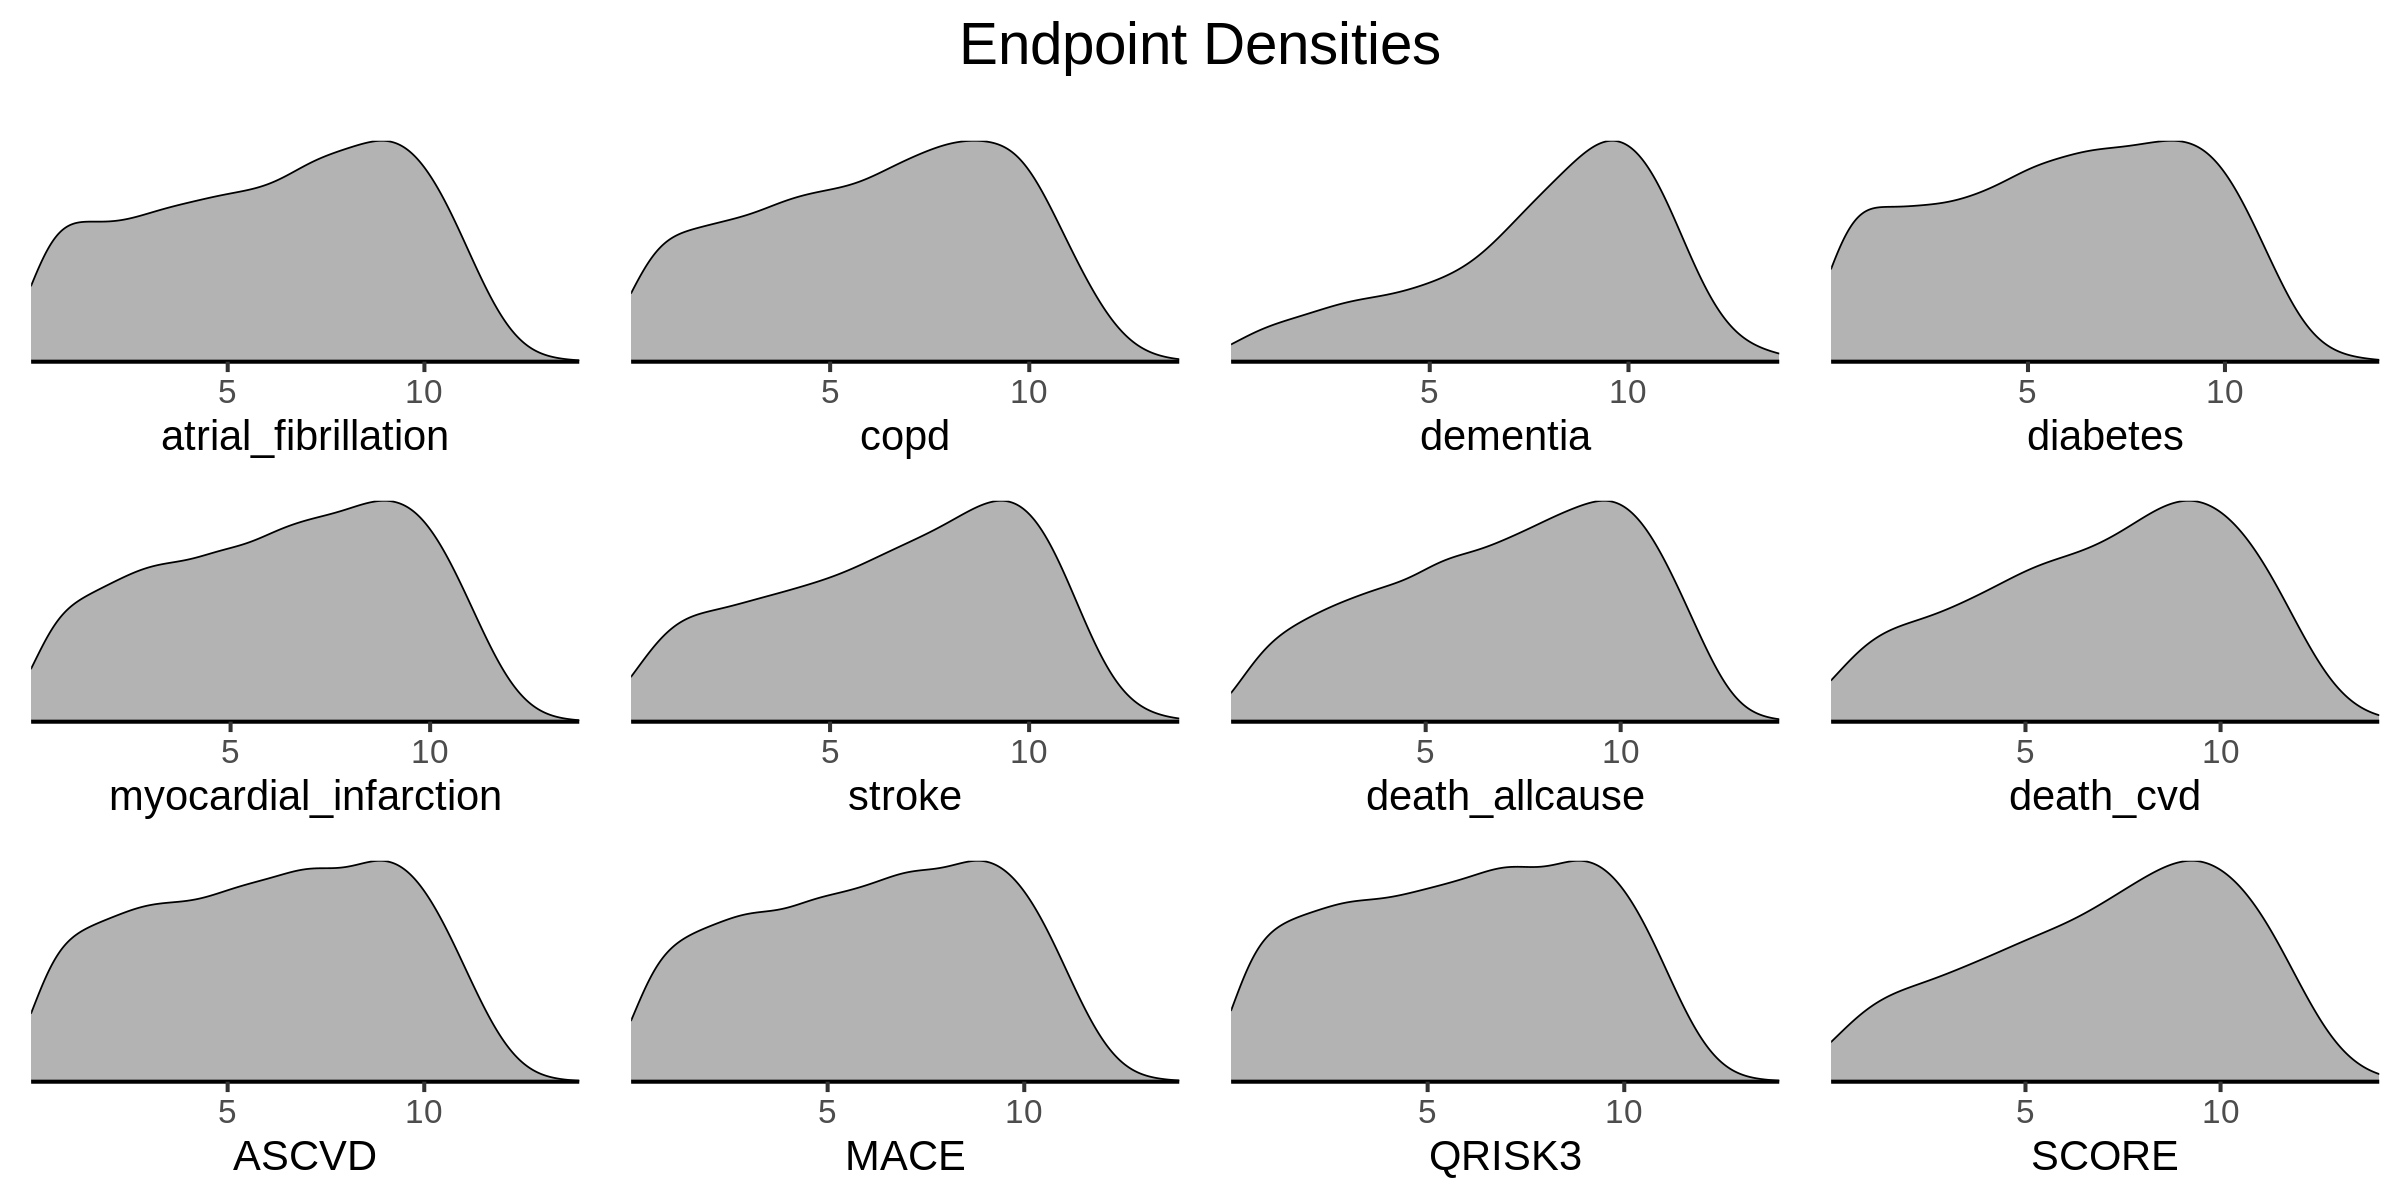

In [25]:
plots_density

## Kaplan Meyer estimates

In [29]:
options(warn=0)

In [30]:
stratum="sex"
plots = list()
tables = list()
plots_tables = list()
expand = c(0.01, 0.8)
for (e in endpoints[-2]){
    #print(e)
    #fit = survfit(Surv(death_cens_time, death_cens)~sex, data = data)
    fit = survfit(as.formula(glue("Surv({e}_event_time, {e}_event)~{stratum}")), data=data)
    plot = ggsurvplot(fit,data, conf.int = TRUE, ylim = c(0.85,1), cumevents=TRUE, cumevents.y.text = FALSE) #, risk.table ="percentage") + scale_color_
    plots[[e]] = plot$plot  + ylab("") + theme(legend.position="none") + 
        ggtitle(e) + theme(plot.title = element_text(size=facet_size, hjust=0.5)) + 
        scale_color_nejm() + scale_fill_nejm() + scale_x_continuous(expand=expand)

    tables[[e]] = plot$cumevents + ylab("") + scale_color_nejm() + scale_fill_nejm() + scale_x_continuous(expand=expand)#+ scale_x_continuous(expand=c(0,0))
    plots_tables[[e]] = plot_grid(plots[[e]], tables[[e]], align="v", nrow=2, rel_heights=c(4,1))
    legend <- get_legend(plots[[e]] + guides(color = guide_legend(nrow = 1)) + theme(legend.position = "bottom", legend.title=element_text(size=base_size), legend.text=element_text(size=base_size)))
}          

Warning message in terms.formula(formula, data = data):
"unable to translate 'm<U+00E9>ni<U+00E8>re's_disease' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'sj<U+00F6>gren's_syndrome' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'm<U+00E9>ni<U+00E8>re's_disease' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'sj<U+00F6>gren's_syndrome' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'm<U+00E9>ni<U+00E8>re's_disease' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'sj<U+00F6>gren's_syndrome' to native encoding"
Warning message in eval(predvars, data, env):
"unable to translate 'm<U+00E9>ni<U+00E8>re's_disease' to native encoding"
Warning message in eval(predvars, data, env):
"unable to translate 'sj<U+00F6>gren's_syndrome' to native encodi

In [31]:
plot_width=20; plot_height=25; plot_dpi=300
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

plots_f = plot_grid(plotlist = plots_tables, ncol=round(length(plots_tables)/3, 0))
plots_km = plot_grid(legend, plots_f, ncol=1, rel_heights=c(0.05, 1))

plot_name = "5_endpoint_km"
ggsave(filename=glue("{dataset_path}/{plot_name}.pdf"), plot=last_plot(), width=plot_width, height=plot_height, dpi=plot_dpi, device="pdf")

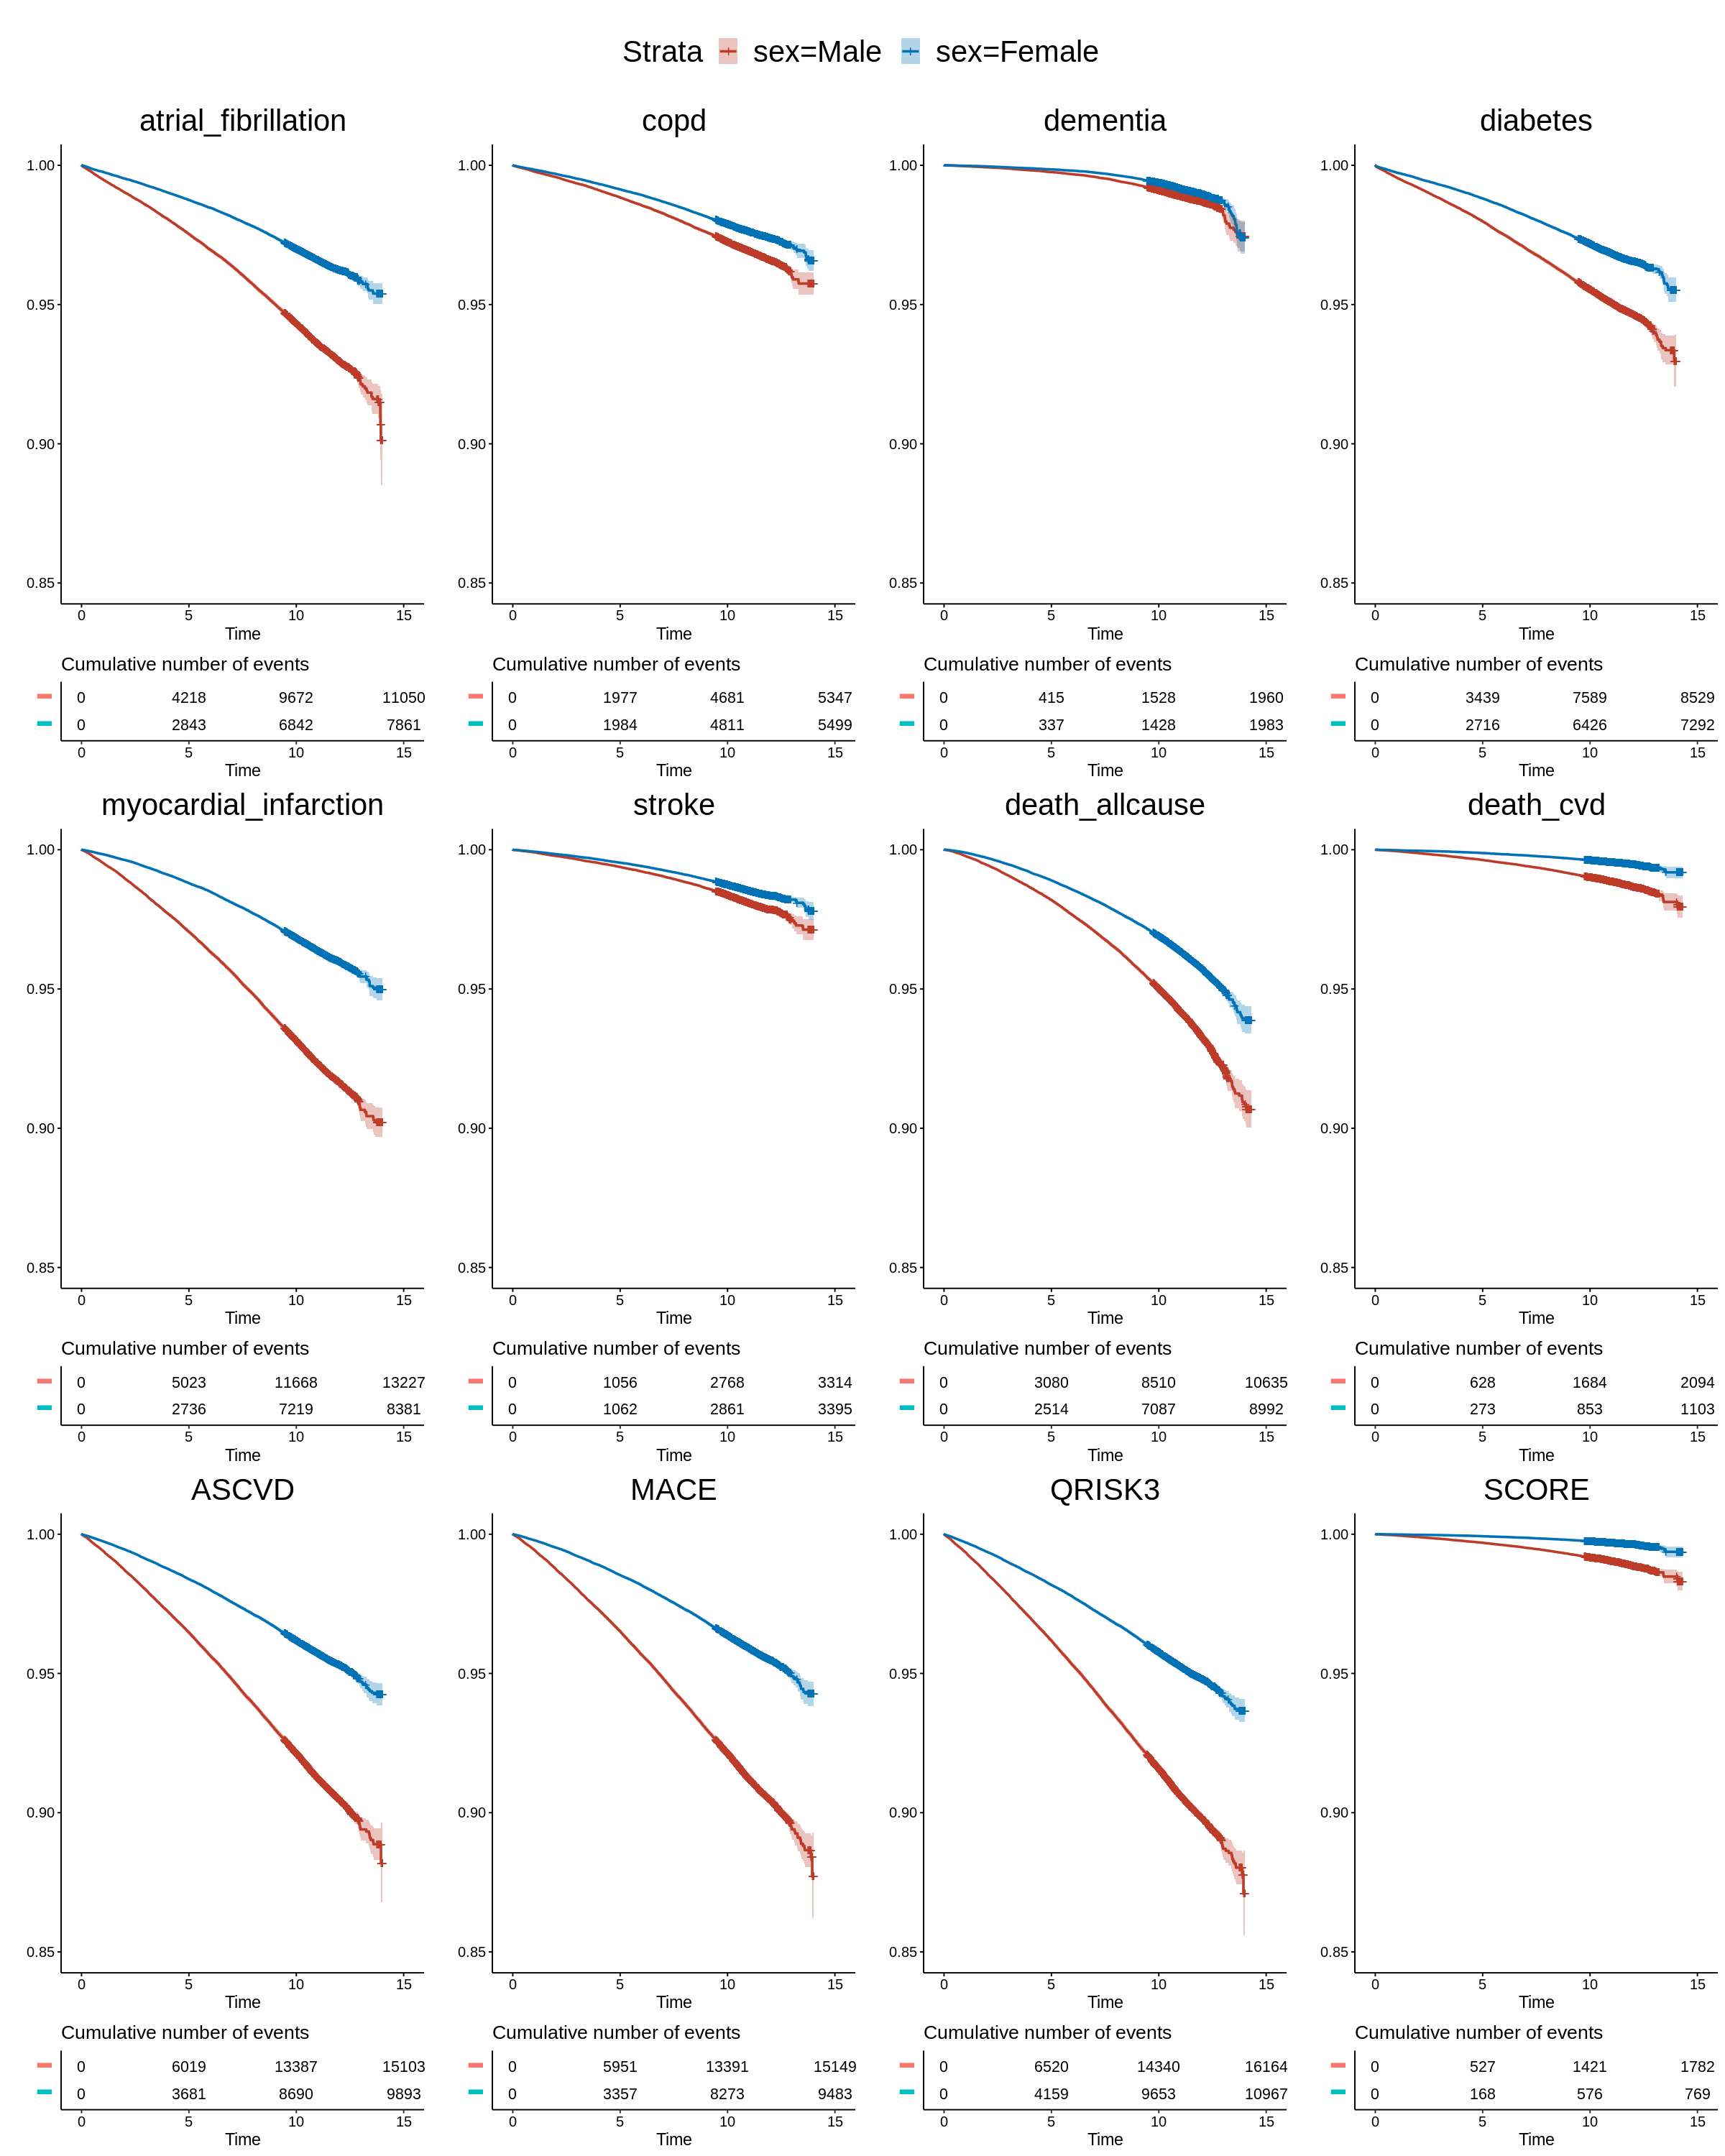

In [32]:
plots_km

## Competing Events

In [ ]:
competing_endpoints

In [ ]:
fit5 <- survfit(Surv(CompetingEvents_event_time, CompetingEvents_event, type = "mstate") ~ 1, data = data)

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggcompetingrisks(fit5, palette = "jco")

In [ ]:
ggsurvplot(fit5,data, conf.int = TRUE, ylim = c(0.70,1), cumevents=TRUE, cumevents.y.text = FALSE)